In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


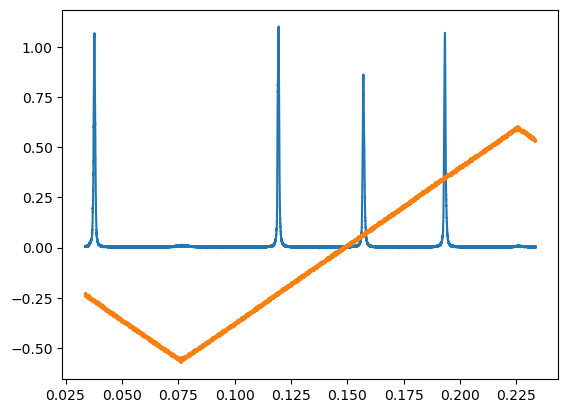

In [125]:
rows = []

import csv

with open('SDS2104X Plus_CSV_ALL_1.csv') as csv_file:
    csv_read=csv.reader(csv_file, delimiter=',')

    for row in csv_read:
        rows.append(row)


t_list = []
amp_list = []
voltage_list = []



for row in rows[12:]:
    # parsing each column of a row
    t_list.append(float(row[0]))
    amp_list.append(float(row[1]))
    voltage_list.append(float(row[2]))

t_step = 0.000001
t_0 = t_list[0]

plt.plot(t_list, amp_list)
plt.plot(t_list, voltage_list)

calculate bandwidth in s

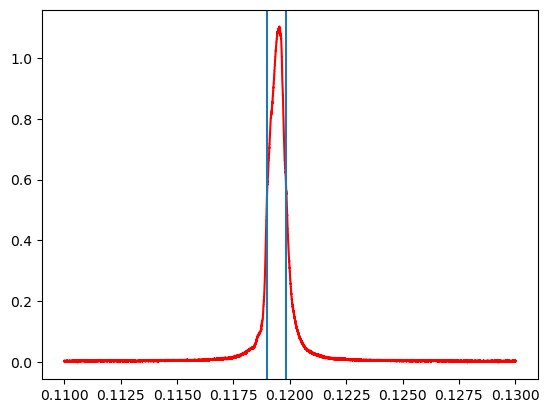

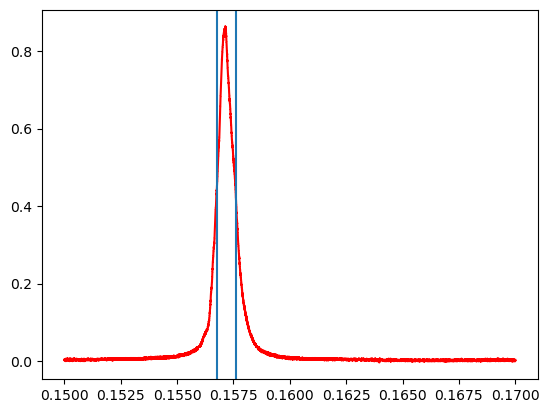

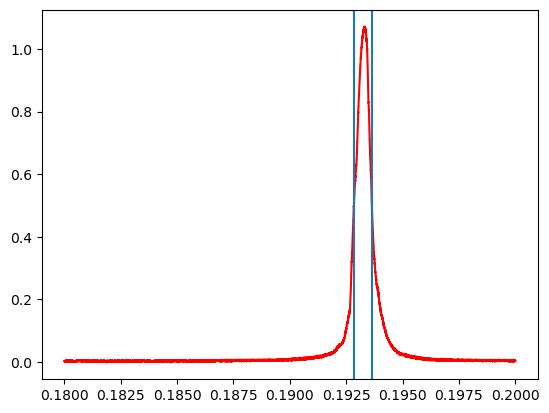

bandwidths (s): [0.0008569999999999967, 0.0008509999999999907, 0.0007589999999999819]
peak locations (s): [0.119533, 0.157132, 0.193319]


In [166]:
def calc_bandwidth(t_list, amp_list):
    half_value = (max(amp_list) - min(amp_list)) / 2

    i_max = amp_list.index(max(amp_list))
    
    # take part before peak for list
    amp_list_left = np.array(amp_list[0:i_max])
    # make list of every index associated with a value below the half value
    # this list ends up being twodimensional, I have no clue why just ignore this
    i_below_half_left = np.where(amp_list_left <= half_value)
    # take the last item of this list, the closest value to the half value
    t_half_left = t_list[i_below_half_left[0][-1]]

    # do the same for the right side
    amp_list_right = np.array(amp_list[i_max:])
    i_below_half_right = np.where(amp_list_right <= half_value)
    t_half_right = t_list[i_below_half_right[0][0] + i_max]

    plt.plot(t_list, amp_list, '-r')
    plt.axvline(t_half_left)
    plt.axvline(t_half_right)
    plt.show()

    bandwidth = t_half_right - t_half_left
    return bandwidth, t_list[i_max]

t_range = 0.01
bandwidths = []
peaks_precise = []

peaks = [0.12, 0.16, 0.19]
for t_peak in peaks:
    i_min = int((t_peak - t_0 - t_range) / t_step) 
    i_max = int((t_peak - t_0 + t_range) / t_step)

    bandwidth, peak_precise = calc_bandwidth(t_list[i_min:i_max], amp_list[i_min:i_max])
    bandwidths.append(bandwidth)
    peaks_precise.append(peak_precise)
print('bandwidths (s):', bandwidths)
print('peak locations (s):', peaks_precise)